In [51]:
import numpy as np
import setuptools.dist
import keras
import pandas as pd
import matplotlib as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras import layers
from mpl_toolkits.mplot3d import Axes3D
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [59]:
df=pd.read_csv('MysqlData.csv')
x=df.iloc[:,3:6]
y=df['Sensor A'].values
print(y.shape)



(957,)


In [61]:
scaler = MinMaxScaler()
x = scaler.fit_transform(x)

num_classes = len(np.unique(y))
y = keras.utils.to_categorical(y, num_classes)


X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [79]:
def add_noise(X, noise_factor=0.02):
    noise = np.random.normal(0, noise_factor, X.shape)  # Kohina normaalijakaumasta
    X_noisy = X + noise
    return np.clip(X_noisy, 0, 2)  # Varmistetaan, että arvot pysyvät sallituissa rajoissa

# Lisää kohinaa alkuperäiseen dataan
X_train_noisy = add_noise(X_train)

In [80]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(3,)),  # Syötteen muoto (X, Y, Z)
    Dense(128, activation='relu'),
    Dense(num_classes, activation='softmax')  # Luokkien määrä
])

# Käännä malli
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Kouluta malli
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10


c:\Users\jarno\Desktop\Random_Code\Random_Code\Python\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.3991 - loss: 1.7234 - val_accuracy: 0.6732 - val_loss: 1.5348
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7188 - loss: 1.4629 - val_accuracy: 0.8562 - val_loss: 1.2530
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8852 - loss: 1.1662 - val_accuracy: 0.8954 - val_loss: 0.9108
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9235 - loss: 0.8107 - val_accuracy: 0.9804 - val_loss: 0.5915
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9867 - loss: 0.5202 - val_accuracy: 0.9935 - val_loss: 0.3586
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9976 - loss: 0.3256 - val_accuracy: 1.0000 - val_loss: 0.2224
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9977 - loss: 0.2102 - val_accuracy: 1.0000 - val_loss: 0.1458
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.1408 - val_accuracy: 1.0000 - val_loss: 0.0988
Ep

In [76]:
# Oletetaan, että X_test ja y_test ovat testijoukon data ja kohteet
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f"Testitappio: {test_loss:.4f}")
print(f"Testitarkkuus: {test_accuracy:.4f}")


6/6 - 0s - 4ms/step - accuracy: 1.0000 - loss: 0.0528
Testitappio: 0.0528
Testitarkkuus: 1.0000


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        16
           2       1.00      1.00      1.00        40
           3       1.00      1.00      1.00        36
           4       1.00      1.00      1.00        52
           5       1.00      1.00      1.00        32

    accuracy                           1.00       192
   macro avg       1.00      1.00      1.00       192
weighted avg       1.00      1.00      1.00       192



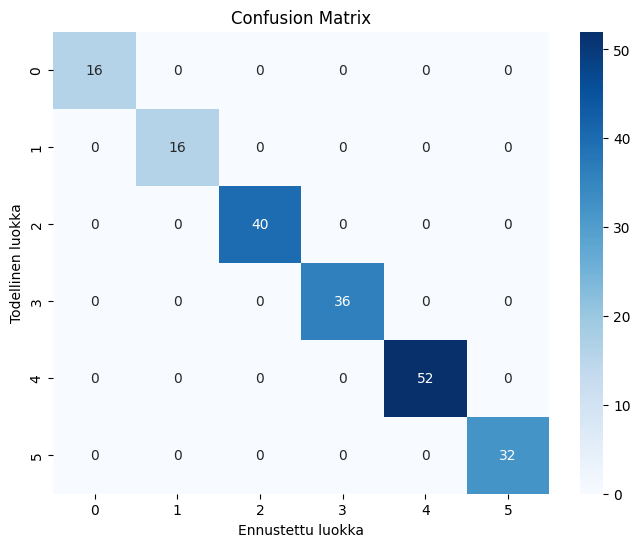

In [81]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Ennusta testidatalla
y_pred = model.predict(X_test).argmax(axis=1)
y_true = y_test.argmax(axis=1)

# Tulosta luokitusraportti
print(classification_report(y_true, y_pred))

# Piirrä Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Ennustettu luokka")
plt.ylabel("Todellinen luokka")
plt.show()


In [34]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [35]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        16,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,826 (136.04 KB)

 Trainable params: 34,826 (136.04 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])